In [78]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib



---
# **Dataset Preparation**
---

In [79]:
data = fetch_ucirepo(id=80)

In [80]:
print(f"Name : {data.metadata.name}")
print(f"Instances : {data.metadata.num_instances}")
print(f"Features : {data.metadata.num_features}")

Name : Optical Recognition of Handwritten Digits
Instances : 5620
Features : 64


In [81]:
# print(data.data.features)
X = pd.DataFrame(data.data.features)
X


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [82]:
Y = pd.DataFrame(data.data.targets)
Y

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


In [83]:
datastore = X.copy()
datastore['target'] = Y
datastore

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,target
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


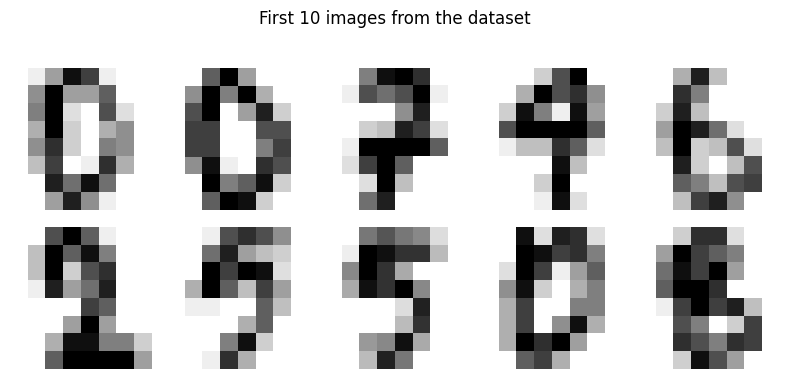

In [84]:
fig , axes = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle("First 10 images from the dataset")

for i in range(10):
 row = X.iloc[i].values.reshape(8,8)
 ax = axes[i//5, i%5]
 ax.imshow(row, cmap='gray_r')
 # ax.title("Image")
 ax.axis('off')

plt.tight_layout()
# plt.subplots_adjust(top=0.85)
plt.show()

In [85]:
datastore.to_csv('Datasets/OCR_Digits.csv', index=False)

---
 # **PREPROCESSING DATA** 
---

In [86]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X) ,columns=X.columns)
X_scaled

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0.0,0.125,0.3750,0.9375,0.7500,0.0625,0.0000,0.0,0.0,0.4375,...,0.0000,0.0,0.0,0.0,0.3750,0.8750,0.4375,0.0625,0.0000,0.0
1,0.0,0.000,0.6250,1.0000,0.3750,0.0000,0.0000,0.0,0.0,0.4375,...,0.1875,0.0,0.0,0.0,0.6250,1.0000,0.9375,0.1875,0.0000,0.0
2,0.0,0.000,0.5000,0.9375,1.0000,0.8125,0.0000,0.0,0.0,0.0625,...,0.0000,0.0,0.0,0.0,0.5625,0.8750,0.0000,0.0000,0.0000,0.0
3,0.0,0.000,0.0000,0.1875,0.6875,1.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.0000,0.0625,0.9375,0.1250,0.0000,0.0
4,0.0,0.000,0.3125,0.8750,0.2500,0.0000,0.0000,0.0,0.0,0.0000,...,0.7500,0.0,0.0,0.0,0.2500,0.7500,0.8750,0.4375,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0.0,0.000,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.2500,0.0,0.0,0.0,0.1250,0.8750,0.9375,0.5625,0.0000,0.0
5616,0.0,0.000,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.0,0.3750,1.0000,0.8750,0.3750,0.0000,0.0
5617,0.0,0.000,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0,0.1250,0.5625,0.8125,0.3750,0.0000,0.0
5618,0.0,0.000,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.0,0.3125,0.7500,1.0000,0.7500,0.0000,0.0


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [88]:
Y_train = Y_train.values.ravel()
Y_train

array([4, 4, 4, ..., 2, 4, 0], shape=(4496,))

# *Dictionary to store precisions for each alogrithm*

In [89]:
models_precision = {}

---
# **K MEANS CLUSTERING**
---

In [90]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [91]:
clusters = pd.DataFrame(kmeans.labels_)
clusters 

,0
0,0
1,0
2,9
3,6
4,5
...,...
5615,8
5616,0
5617,2
5618,8


In [92]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])
X_pca['target'] = clusters
X_pca

,PC1,PC2,target
0,0.694448,-0.678455,0
1,0.789657,-1.274392,0
2,-0.848025,1.075454,9
3,-0.362727,1.149420,6
4,1.120892,-0.879576,5
...,...,...,...
5615,-0.485703,-0.662198,8
5616,0.907303,-0.344577,0
5617,0.408510,0.508931,2
5618,-0.002755,-0.353210,8


In [93]:
cluster_centers = kmeans.cluster_centers_
cluster_centers = pca.transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=['PC1', 'PC2'])
cluster_centers


d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2
0,0.765049,-0.704773
1,1.047305,1.123890
2,-0.131173,0.440524
3,-0.856930,-0.672078
4,-0.292630,-0.709754
5,1.432053,-0.236267
6,-0.317000,0.814559
7,-0.140318,0.064076
8,-0.324768,-0.762440
9,-0.921313,0.940282


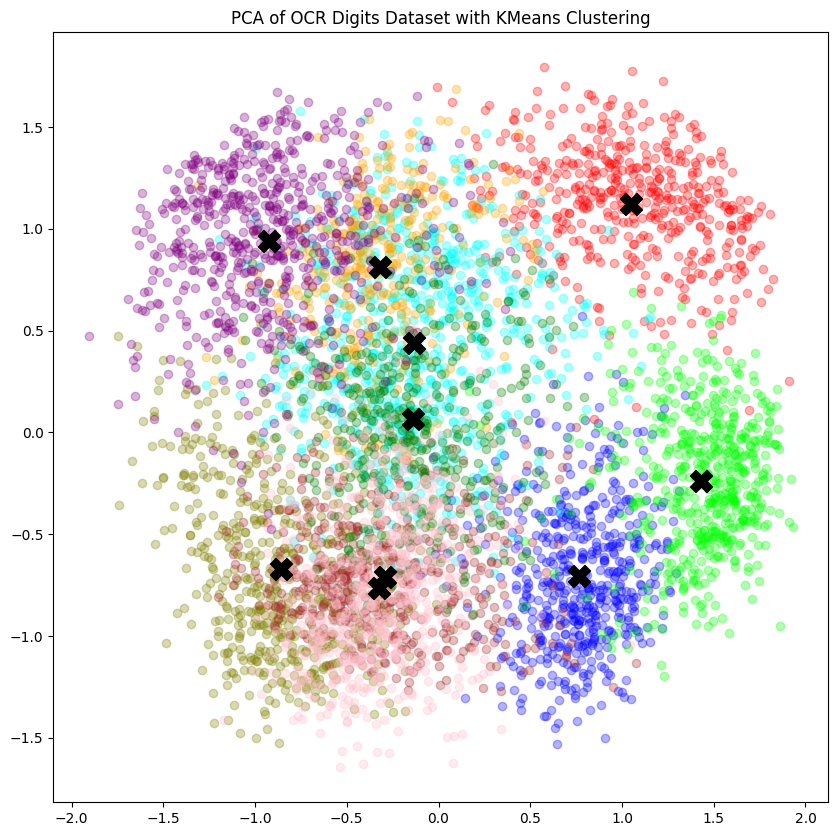

In [94]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[X_pca['target'] == 0]['PC1'], X_pca[X_pca['target'] == 0]['PC2'], c='blue', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 1]['PC1'], X_pca[X_pca['target'] == 1]['PC2'], c='red', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 2]['PC1'], X_pca[X_pca['target'] == 2]['PC2'], c='cyan', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 3]['PC1'], X_pca[X_pca['target'] == 3]['PC2'], c='olive', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 4]['PC1'], X_pca[X_pca['target'] == 4]['PC2'], c='brown', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 5]['PC1'], X_pca[X_pca['target'] == 5]['PC2'], c='lime', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 6]['PC1'], X_pca[X_pca['target'] == 6]['PC2'], c='orange', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 7]['PC1'], X_pca[X_pca['target'] == 7]['PC2'], c='green', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 8]['PC1'], X_pca[X_pca['target'] == 8]['PC2'], c='pink', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 9]['PC1'], X_pca[X_pca['target'] == 9]['PC2'], c='purple', label='Cluster 0' , alpha=0.3)
# plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['target'], cmap='viridis', alpha=0.5, label='Clusters')

plt.scatter(cluster_centers['PC1'], cluster_centers['PC2'], c='black', marker='X', s=250, label='Centroids')  
plt.title('PCA of OCR Digits Dataset with KMeans Clustering')
plt.show()


In [96]:
Y_flat = Y.values.ravel()
nmi = normalized_mutual_info_score(Y_flat, kmeans.labels_)
nmi = float(nmi)

print(f"Normalized Mutual Information (NMI): {nmi*100:.4f}")
models_precision['KMeans'] = nmi

Normalized Mutual Information (NMI): 74.5302


---
# **KNN CLASSIFICATION**
---

In [97]:
knn_score = {}

In [98]:
for i in range(10):
 knn = KNeighborsClassifier(n_neighbors=i+1)
 knn.fit(X_train, Y_train)
 Y_pred = knn.predict(X_test)
 print(f"n_neighbors = {i+1} :")
 score = knn.score(X_test, Y_test)*100
 knn_score[i+1] = score
 print(f"KNN score : {score}")
 print(classification_report(Y_test, Y_pred))
 # print(confusion_matrix(Y_test, Y_pred))
 print("\n\n")


n_neighbors = 1 :
KNN score : 98.66548042704626
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.95      1.00      0.98       102
           2       0.99      1.00      1.00       107
           3       0.98      0.97      0.97       118
           4       1.00      1.00      1.00       117
           5       0.98      0.99      0.98        97
           6       1.00      0.99      1.00       123
           7       0.99      1.00      1.00       124
           8       0.99      0.97      0.98       105
           9       0.97      0.95      0.96       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124




n_neighbors = 2 :
KNN score : 98.30960854092527
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.94      1.00

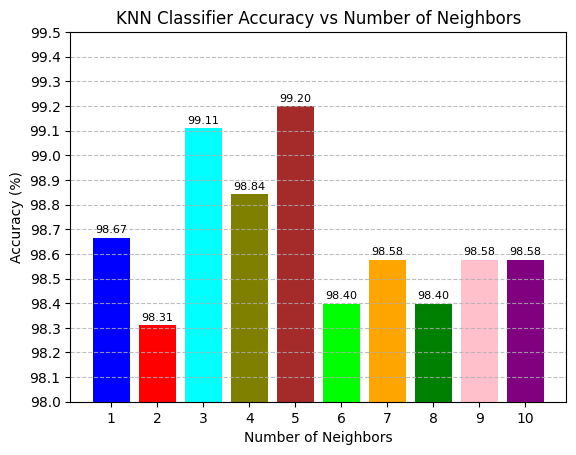

In [99]:
colors = ["blue", "red", "cyan", "olive", "brown", "lime", "orange", "green", "pink", "purple"]

plt.yticks(np.arange(0, 100 , 0.1))
plt.xticks(np.arange(1, 11, 1))
plt.ylim(98,99.5)

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy (%)")
plt.title("KNN Classifier Accuracy vs Number of Neighbors")

plt.bar(knn_score.keys(), knn_score.values(), color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.8)

for i , (label,value) in enumerate(knn_score.items()):
 plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)


In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(f"n_neighbors = 5 :")
score = knn.score(X_test, Y_test)*100
print(f"KNN score : {score}")
reportKNN = classification_report(Y_test, Y_pred , output_dict=True)
print(f"Classification Report:\n{reportKNN}")
print(confusion_matrix(Y_test, Y_pred))

n_neighbors = 5 :
KNN score : 99.19928825622776
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108.0}, '1': {'precision': 0.9807692307692307, 'recall': 1.0, 'f1-score': 0.9902912621359223, 'support': 102.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 107.0}, '3': {'precision': 0.9914529914529915, 'recall': 0.9830508474576272, 'f1-score': 0.9872340425531915, 'support': 118.0}, '4': {'precision': 1.0, 'recall': 0.9914529914529915, 'f1-score': 0.9957081545064378, 'support': 117.0}, '5': {'precision': 0.9896907216494846, 'recall': 0.9896907216494846, 'f1-score': 0.9896907216494846, 'support': 97.0}, '6': {'precision': 0.991869918699187, 'recall': 0.991869918699187, 'f1-score': 0.991869918699187, 'support': 123.0}, '7': {'precision': 0.992, 'recall': 1.0, 'f1-score': 0.9959839357429718, 'support': 124.0}, '8': {'precision': 0.9904761904761905, 'recall': 0.9904761904761905, 'f1-score': 0.9904761904761905, 'support': 105.0}, 

In [101]:
reportKNN = reportKNN["weighted avg"]
models_precision["KNN"] = reportKNN

---
# **NAIVE BAYES**
---

In [102]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [103]:
Y_pred = naive_bayes.predict(X_test)
print(f"Naive Bayes score : {naive_bayes.score(X_test, Y_test)*100}")

Naive Bayes score : 78.46975088967972


In [104]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[108   0   0   0   0   0   0   0   0   0]
 [  0  85   0   0   0   0   3   0  10   4]
 [  0   4  70   0   0   0   0   0  33   0]
 [  0   0   0  67   0   0   0   3  44   4]
 [  3   9   0   0  68   0   1  29   6   1]
 [  2   2   0   0   1  64   1   2  20   5]
 [  1   1   0   0   0   1 119   0   1   0]
 [  0   0   0   0   0   0   0 122   1   1]
 [  1   2   0   0   0   1   0   1 100   0]
 [  3   6   0   2   0   0   0  12  21  79]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       0.78      0.83      0.81       102
           2       1.00      0.65      0.79       107
           3       0.97      0.57      0.72       118
           4       0.99      0.58      0.73       117
           5       0.97      0.66      0.79        97
           6       0.96      0.97      0.96       123
           7       0.72      0.98      0.83       124
           8       0.42      0.95      0.59       105
           9       0.84     

In [105]:
reportNB = classification_report(Y_test, Y_pred , output_dict=True)
reportNB = reportNB["weighted avg"]

In [106]:
models_precision["Naive Bayes"] = reportNB

---
# **LOGISTIC REGRESSION**
---

In [107]:
logistic_regression = LogisticRegression(max_iter=1000, C= 0.01, random_state=42)
logistic_regression.fit(X_train, Y_train)

Y_pred = logistic_regression.predict(X_test)
print(f"Logistic Regression score : {logistic_regression.score(X_test, Y_test)*100}")

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Logistic Regression score : 93.32740213523132
[[107   0   0   0   1   0   0   0   0   0]
 [  0  92   0   0   0   0   3   1   2   4]
 [  0   2 100   0   0   0   0   1   3   1]
 [  0   0   0 111   0   3   0   1   1   2]
 [  0   0   0   0 110   0   2   2   2   1]
 [  0   2   0   0   1  89   0   0   0   5]
 [  1   2   0   0   0   0 120   0   0   0]
 [  0   1   0   0   0   1   0 122   0   0]
 [  0   8   0   2   1   2   0   0  89   3]
 [  0   2   0   2   4   2   0   1   3 109]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.84      0.90      0.87       102
           2       1.00      0.93      0.97       107
           3       0.97      0.94      0.95       118
           4       0.94      0.94      0.94       117
           5       0.92      0.92      0.92        97
           6       0.96      0.98      0.97       123
           7       0.95      0.98      0.97       124
           8       0.89      0.85   

In [108]:
reportLR = classification_report(Y_test, Y_pred, output_dict=True)
reportLR = reportLR["weighted avg"]
models_precision["LR"] = reportLR

---
# **SVC**
---

In [109]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for krnl in kernels:
 svc = SVC(kernel=krnl , random_state=42)
 svc.fit(X_train, Y_train)

 Y_pred = svc.predict(X_test)
 print(f"Kernel Used : {krnl}")
 print(f"SVC score : {svc.score(X_test, Y_test)*100}")

Kernel Used : linear
SVC score : 98.22064056939502
Kernel Used : poly
SVC score : 99.19928825622776
Kernel Used : rbf
SVC score : 98.84341637010677
Kernel Used : sigmoid
SVC score : 82.91814946619218


Degree : 1 SVC score : 97.41992882562278
Degree : 2 SVC score : 98.75444839857651
Degree : 3 SVC score : 99.19928825622776
Degree : 4 SVC score : 99.37722419928826
Degree : 5 SVC score : 99.02135231316726
Degree : 6 SVC score : 98.93238434163702
Degree : 7 SVC score : 98.66548042704626
Degree : 8 SVC score : 98.30960854092527
Degree : 9 SVC score : 98.04270462633453


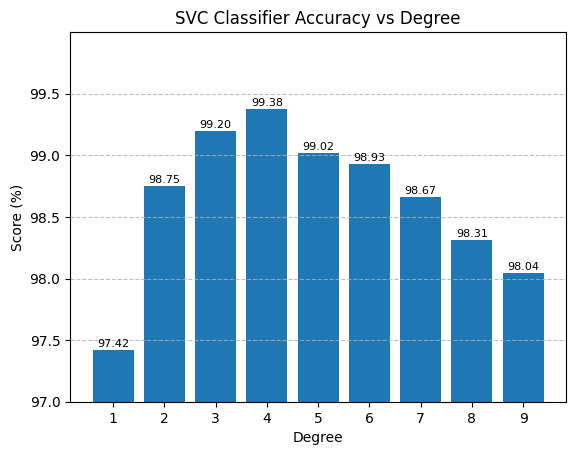

In [110]:
svc_comparison = {}

for i in range (1,10):
 svc = SVC(kernel='poly', random_state=42, degree=i)
 svc.fit(X_train, Y_train)

 Y_pred = svc.predict(X_test)
 svc_score = svc.score(X_test, Y_test)*100
 svc_comparison[i] = svc_score
 print(f"Degree : {i} SVC score : {svc_score}")
 
plt.yticks(np.arange(97,100,0.5))
plt.xticks(np.arange(1, 10, 1))
plt.ylim(97,100)
plt.ylabel("Score (%)")
plt.xlabel("Degree")
plt.title("SVC Classifier Accuracy vs Degree")
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.bar(svc_comparison.keys(), svc_comparison.values())
for i , (label,value) in enumerate(svc_comparison.items()):
 plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)


In [111]:
svc = SVC(kernel='poly', random_state=42, degree=4)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print(f"Degree : 4 SVC score : {svc.score(X_test, Y_test)*100}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Degree : 4 SVC score : 99.37722419928826
[[107   0   0   0   0   0   0   0   1   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   0 116   0   2   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   1   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   1   0   0   0   0   1 121]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.99      1.00      1.00       102
           2       1.00      0.99      1.00       107
           3       0.99      0.98      0.99       118
           4       1.00      1.00      1.00       117
           5       0.98      1.00      0.99        97
           6       1.00      0.99      1.00       123
           7       1.00      1.00      1.00       124
           8       0.98      1.00      0.

In [112]:
reportSVC = classification_report(Y_test, Y_pred , output_dict=True)
reportSVC = reportSVC["weighted avg"]
models_precision["SVC"] = reportSVC

---
# **RANDOM FOREST**
---

In [130]:
n_estimators_comparison = {}

for n in range(100 , 200 , 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    
    Y_pred = rf.predict(X_test)
    print(f"n_estimators = {n} :", end=" ")
    score = rf.score(X_test, Y_test)*100
    print(f"Random Forest score : {score}")
    n_estimators_comparison[n] = score

n_estimators = 100 : Random Forest score : 98.04270462633453
n_estimators = 110 : Random Forest score : 98.22064056939502
n_estimators = 120 : Random Forest score : 98.30960854092527
n_estimators = 130 : Random Forest score : 98.22064056939502
n_estimators = 140 : Random Forest score : 98.13167259786478
n_estimators = 150 : Random Forest score : 98.13167259786478
n_estimators = 160 : Random Forest score : 98.13167259786478
n_estimators = 170 : Random Forest score : 98.13167259786478
n_estimators = 180 : Random Forest score : 98.13167259786478
n_estimators = 190 : Random Forest score : 98.13167259786478


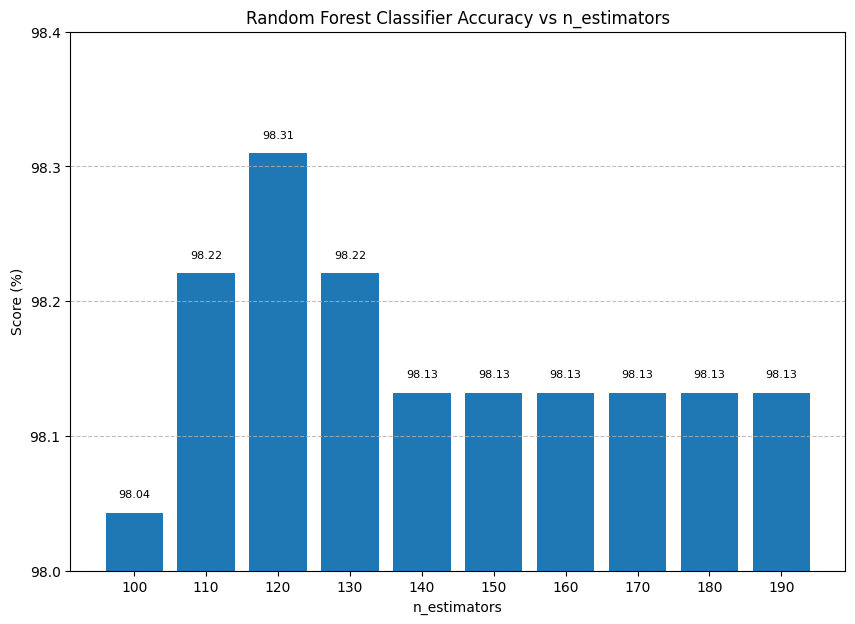

In [132]:
plt.figure(figsize=(10, 7))
plt.yticks(np.arange(98,98.4,0.1))
plt.xticks(np.arange(100, 300, 10))
plt.ylim(98,98.4)
plt.ylabel("Score (%)")
plt.xlabel("n_estimators")
plt.title("Random Forest Classifier Accuracy vs n_estimators")
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.bar(n_estimators_comparison.keys(), n_estimators_comparison.values(),width=8)
for i , (label,value) in enumerate(n_estimators_comparison.items()):
    plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

In [115]:
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
print(f"Random Forest score : {rf.score(X_test, Y_test)*100}\n")
print(confusion_matrix(Y_test, Y_pred),end="\n\n")
print(classification_report(Y_test, Y_pred))


Random Forest score : 98.30960854092527

[[107   0   0   0   1   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   1]
 [  0   0   0 116   0   1   0   0   1   0]
 [  0   0   0   0 115   0   2   0   0   0]
 [  0   0   0   1   1  94   0   0   1   0]
 [  1   2   0   0   0   0 120   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   1   0   0   0   0   0   0 104   0]
 [  0   2   0   1   0   0   0   1   2 117]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.95      1.00      0.98       102
           2       1.00      0.99      1.00       107
           3       0.98      0.98      0.98       118
           4       0.98      0.98      0.98       117
           5       0.99      0.97      0.98        97
           6       0.98      0.98      0.98       123
           7       0.99      1.00      1.00       124
           8       0.96      0.99      0

In [116]:
reportRF = classification_report(Y_test, Y_pred , output_dict=True)
reportRF = reportRF["weighted avg"]
models_precision["RF"] = reportRF

---
# **METRICS COMPARISON**
---

In [117]:
precision_scores = {
 "KMeans": models_precision["KMeans"]*100,
 "KNN": models_precision["KNN"]["f1-score"]*100,
 "Naive Bayes": models_precision["Naive Bayes"]["f1-score"]*100,
 "LR": models_precision["LR"]["f1-score"]*100,
 "SVC": models_precision["SVC"]["f1-score"]*100,
 "RF": models_precision["RF"]["f1-score"]*100
}
precision_scores

{'KMeans': 74.53024922868923,
 'KNN': 99.19866403797954,
 'Naive Bayes': 79.11322212761598,
 'LR': 93.3404042648819,
 'SVC': 99.37747845418345,
 'RF': 98.30881040671568}

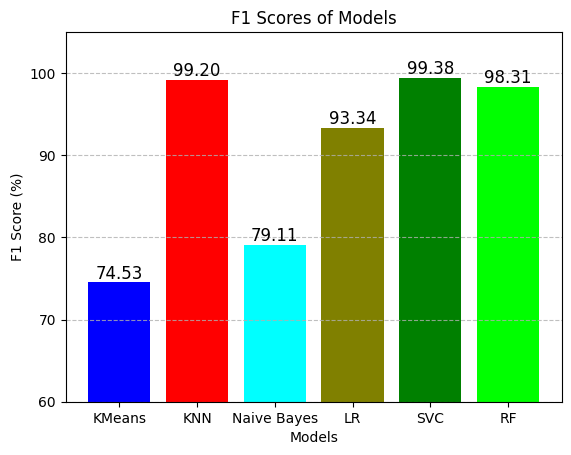

In [118]:
colors = ["blue", "red", "cyan", "olive", "green", "lime"]

plt.yticks(np.arange(0, 105 , 10))
plt.ylim(60,105)

plt.xlabel("Models")
plt.ylabel("F1 Score (%)")
plt.title("F1 Scores of Models")

plt.bar(precision_scores.keys(), precision_scores.values(), color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.8)
for i , (label,value) in enumerate(precision_scores.items()):
 plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

In [119]:
metrics = ["precision", "recall", "f1-score"]

KNNmetrics = []
NBmetrics = []
SVCmetrics = []
LRMetrics = []
RFMetrics = []
for metric in metrics:
 KNNmetrics.append(models_precision["KNN"][metric]*100)
 NBmetrics.append(models_precision["Naive Bayes"][metric]*100)
 SVCmetrics.append(models_precision["SVC"][metric]*100)
 LRMetrics.append(models_precision["LR"][metric]*100)
 RFMetrics.append(models_precision["RF"][metric]*100)


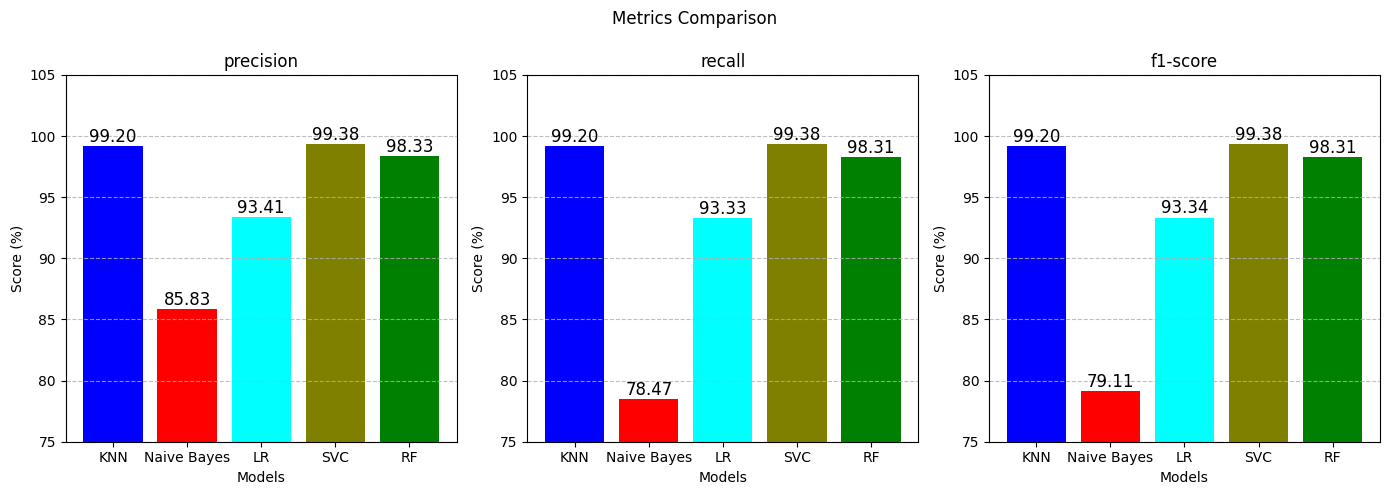

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle("Metrics Comparison")

for i in range(3):
 axes[i].bar(["KNN", "Naive Bayes","LR", "SVC", "RF"], [KNNmetrics[i], NBmetrics[i] , LRMetrics[i] , SVCmetrics[i], RFMetrics[i]], color=colors[:5])
 axes[i].set_title(metrics[i])
 axes[i].set_ylim(75, 105)
 axes[i].set_ylabel("Score (%)")
 axes[i].set_xlabel("Models")
 axes[i].grid(axis='y', linestyle='--', alpha=0.8)
 for j , (label,value) in enumerate(zip(["KNN", "Naive Bayes","LR" , "SVC" , "RF"], [KNNmetrics[i], NBmetrics[i],LRMetrics[i], SVCmetrics[i], RFMetrics[i]])):
  axes[i].text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


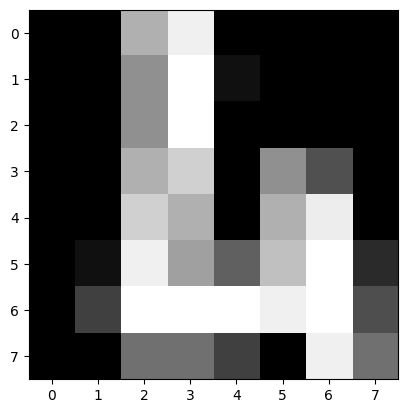

In [121]:
test_val = X_test.iloc[1110].values
test_img = test_val.reshape(8,8)
plt.imshow(test_img, cmap="gray")

tests = {}
tests["SVC"] = svc.predict([test_val])[0]
tests["KNN"] = knn.predict([test_val])[0]
tests["LR"] = logistic_regression.predict([test_val])[0]

In [122]:
print("Predictions for the test image:")
for model, prediction in tests.items():
 print(f"{model}: {prediction}")

print(Y_test.iloc[1110].values[0])

Predictions for the test image:
SVC: 4
KNN: 6
LR: 6
4


In [123]:
joblib.dump(svc, 'Models/SVC_model.pkl')

['Models/SVC_model.pkl']

In [124]:
joblib.dump(knn, 'Models/KNN_model.pkl')

['Models/KNN_model.pkl']

In [125]:
joblib.dump(logistic_regression, 'Models/LR_model.pkl')

['Models/LR_model.pkl']

In [126]:
joblib.dump(naive_bayes, 'Models/NaiveBayes_model.pkl')

['Models/NaiveBayes_model.pkl']

In [127]:
joblib.dump(rf, 'Models/RF_model.pkl')

['Models/RF_model.pkl']